In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'Accurate_HDP.ipynb', 'heart.csv', 'Heart_disease_prediction.ipynb', 'model_joblib_heart', 'README.md', 'WhatsApp Image 2023-05-18 at 12.48.32 AM.jpeg']


In [2]:
dataset = pd.read_csv("heart.csv")

In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset.shape

(303, 14)

In [5]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3,0
113,43,1,0,110,211,0,1,161,0,0.0,2,0,3,1


In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
###Luckily, we have no missing values

In [10]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [11]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [12]:
dataset["target"].unique()

array([1, 0], dtype=int64)

In [13]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [14]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

1    165
0    138
Name: target, dtype: int64


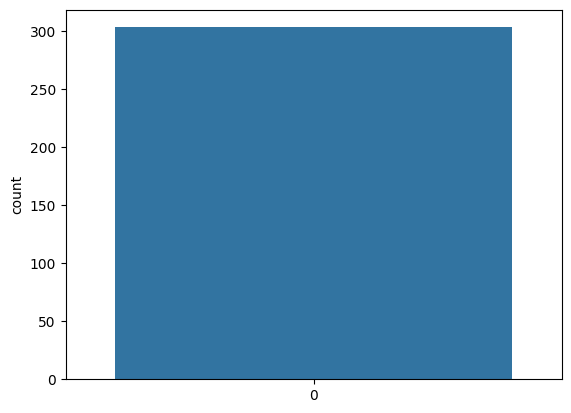

In [15]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [16]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [17]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

In [18]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

In [19]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [20]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

In [21]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

In [22]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

In [23]:
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

In [24]:
#number of major vessels (0-3) colored by flourosopy

In [25]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<Axes: ylabel='count'>

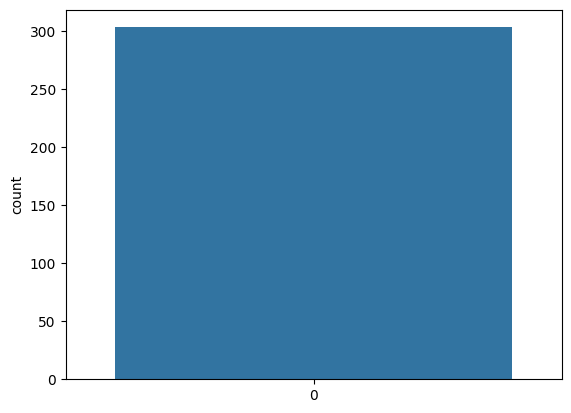

In [26]:
sns.countplot(dataset["ca"])

In [27]:
### Analysing the 'thal' feature

In [28]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

<Axes: xlabel='thal', ylabel='Density'>

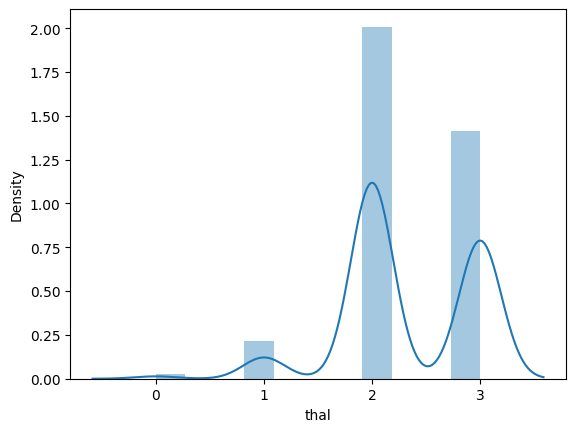

In [29]:
sns.distplot(dataset["thal"])

In [30]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [31]:
X_train.shape

(242, 13)

In [32]:
X_test.shape

(61, 13)

In [33]:
Y_train.shape

(242,)

In [34]:
Y_test.shape

(61,)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [37]:
Y_pred_lr.shape

(61,)

In [38]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [39]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [40]:
Y_pred_nb.shape

(61,)

In [41]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [42]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [43]:
Y_pred_svm.shape

(61,)

In [44]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [46]:
Y_pred_knn.shape

(61,)

In [47]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


In [48]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [49]:
print(Y_pred_dt.shape)

(61,)


In [50]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


In [51]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [52]:
Y_pred_xgb.shape

(61,)

In [53]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 78.69 %


In [54]:
#Neural Network


In [55]:
from keras.models import Sequential
from keras.layers import Dense

In [56]:

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [57]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 [==============================] - 2s 5ms/step - loss: 14.1364 - accuracy: 0.4008
Epoch 2/300
8/8 [==============================] - 0s 4ms/step - loss: 10.8756 - accuracy: 0.4050
Epoch 3/300
8/8 [==============================] - 0s 5ms/step - loss: 9.9422 - accuracy: 0.4215
Epoch 4/300
8/8 [==============================] - 0s 6ms/step - loss: 9.6736 - accuracy: 0.4091
Epoch 5/300
8/8 [==============================] - 0s 5ms/step - loss: 9.1673 - accuracy: 0.4215
Epoch 6/300
8/8 [==============================] - 0s 6ms/step - loss: 8.8512 - accuracy: 0.4050
Epoch 7/300
8/8 [==============================] - 0s 6ms/step - loss: 8.4617 - accuracy: 0.4050
Epoch 8/300
8/8 [==============================] - 0s 6ms/step - loss: 8.0388 - accuracy: 0.4215
Epoch 9/300
8/8 [==============================] - 0s 5ms/step - loss: 7.6673 - accuracy: 0.4215
Epoch 10/300
8/8 [==============================] - 0s 7ms/step - loss: 7.2965 - accuracy: 0.4298
Epoch 11/300
8/8 [=========

8/8 [==============================] - 0s 4ms/step - loss: 0.4418 - accuracy: 0.7975
Epoch 85/300
8/8 [==============================] - 0s 4ms/step - loss: 0.4317 - accuracy: 0.7893
Epoch 86/300
8/8 [==============================] - 0s 4ms/step - loss: 0.4206 - accuracy: 0.8058
Epoch 87/300
8/8 [==============================] - 0s 4ms/step - loss: 0.4320 - accuracy: 0.7810
Epoch 88/300
8/8 [==============================] - 0s 3ms/step - loss: 0.4252 - accuracy: 0.8017
Epoch 89/300
8/8 [==============================] - 0s 4ms/step - loss: 0.4248 - accuracy: 0.8058
Epoch 90/300
8/8 [==============================] - 0s 4ms/step - loss: 0.4403 - accuracy: 0.8017
Epoch 91/300
8/8 [==============================] - 0s 4ms/step - loss: 0.4525 - accuracy: 0.7893
Epoch 92/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8182
Epoch 93/300
8/8 [==============================] - 0s 4ms/step - loss: 0.4133 - accuracy: 0.8182
Epoch 94/300
8/8 [===============

8/8 [==============================] - 0s 3ms/step - loss: 0.3667 - accuracy: 0.8430
Epoch 168/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3677 - accuracy: 0.8430
Epoch 169/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3713 - accuracy: 0.8430
Epoch 170/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3749 - accuracy: 0.8595
Epoch 171/300
8/8 [==============================] - 0s 4ms/step - loss: 0.3757 - accuracy: 0.8306
Epoch 172/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3756 - accuracy: 0.8388
Epoch 173/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3838 - accuracy: 0.8223
Epoch 174/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3788 - accuracy: 0.8388
Epoch 175/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3766 - accuracy: 0.8595
Epoch 176/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3899 - accuracy: 0.8388
Epoch 177/300
8/8 [=====

8/8 [==============================] - 0s 3ms/step - loss: 0.3761 - accuracy: 0.8264
Epoch 250/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3603 - accuracy: 0.8388
Epoch 251/300
8/8 [==============================] - 0s 4ms/step - loss: 0.3680 - accuracy: 0.8471
Epoch 252/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3953 - accuracy: 0.8347
Epoch 253/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3742 - accuracy: 0.8264
Epoch 254/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3812 - accuracy: 0.8182
Epoch 255/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3833 - accuracy: 0.8306
Epoch 256/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3581 - accuracy: 0.8471
Epoch 257/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3625 - accuracy: 0.8388
Epoch 258/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3873 - accuracy: 0.8347
Epoch 259/300
8/8 [=====

In [58]:
Y_pred_nn = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [59]:
Y_pred_nn.shape

(61, 1)

In [60]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [61]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

The accuracy score achieved using Neural Network is: 80.33 %


In [62]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using XGBoost is: 78.69 %
The accuracy score achieved using Neural Network is: 80.33 %


In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)


DecisionTreeClassifier()

In [65]:
import pandas as pd

In [66]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,
},index=[0])

In [67]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [68]:
p = dt.predict(new_data)
if p[0]==0:
    print("No Heart Disease")
else:  
    print("Heart Disease")

No Heart Disease


In [69]:
import joblib

In [70]:
joblib.dump(dt,'model_joblib_heart')

['model_joblib_heart']

In [71]:
model = joblib.load('model_joblib_heart')

In [72]:
model.predict(new_data)

array([0], dtype=int64)

In [73]:
from tkinter import*
import joblib

In [74]:
def show_entry_fields():
    p1=int (e1.get())
    p2=int (e2.get())
    p3=int (e3.get())
    p4=int (e4.get())
    p5=int (e5.get())
    p6=int (e6.get())
    p7=int (e7.get())
    p8=int (e8.get())
    p9=int (e9.get())
    p10=float (e10.get())
    p11=int (e11.get())
    p12=int (e12.get())
    p13=int (e13.get())
    model=joblib.load('model_joblib_heart')
    result=model.predict([[p1, p2, p3,p4, p5, p6, p7, p8, p8, p10, p11, p12,p13]])
                          
    if result == 0:
        Label (master, text="No Heart Diseases").grid (row=31)
    else:
        Label (master, text="Possibility of Heart Diseases").grid (row=31)
                          
master=Tk ()
master.title("Heart Diseases Prediction System") 
                          

label=Label (master, text = "Heart Diseases Prediction System"
               , bg="black", fg = "white"). \
                          grid (row=0, columnspan=2)

Label (master, text="Enter Your Age").grid (row=1)
Label (master, text="Male Or Female [1/0]").grid (row=2)
Label (master, text="Enter Value of CP").grid (row=3)
Label (master, text="Enter Value of trestbps").grid (row=4)
Label (master, text="Enter Value of chol").grid (row=5)
Label (master, text="Enter Value of fbs").grid (row=6)        
Label (master, text="Enter Value of restecg").grid (row=7)
Label (master, text="Enter Value of thalach").grid (row=8) 
Label (master, text="Enter Value of exang").grid (row=9)
Label (master, text="Enter Value of oldpeak").grid (row=10)
Label (master, text="Enter Value of slope").grid (row=11)
Label (master, text="Enter Value of ca").grid (row=12)
Label (master, text="Enter Value of thal").grid (row=13) 

e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)
e7=Entry(master)
e8=Entry(master)
e9=Entry(master)
e10=Entry(master)
e11=Entry(master)
e12=Entry(master)
e13=Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)


Button(master, text='predict', command=show_entry_fields).grid()

mainloop()